<a href="https://colab.research.google.com/github/TbRaihan/Forecasting-Doge-Coin-Price/blob/main/Tubagus_Raihan_Ramadhan_3333210079_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import dataset**
dataset source : https://www.kaggle.com/datasets/neelgajare/dogecoin-historical-price-data?resource=download

In [75]:
# https://drive.google.com/file/d/1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN/view?usp=sharing

!gdown 1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN

Downloading...
From: https://drive.google.com/uc?id=1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN
To: /content/DOGE-USD (3).csv
100% 114k/114k [00:00<00:00, 98.6MB/s]


In [76]:
train_data = pd.read_csv('DOGE-USD (3).csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/11/2017,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,10/11/2017,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,11/11/2017,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,12/11/2017,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,13/11/2017,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1722 non-null   object 
 1   Open       1722 non-null   float64
 2   High       1722 non-null   float64
 3   Low        1722 non-null   float64
 4   Close      1722 non-null   float64
 5   Adj Close  1722 non-null   float64
 6   Volume     1722 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.3+ KB


**Check statistic vales for every features**

In [78]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03
mean,0.059366,0.062913,0.055880,0.059412,0.059412,1.026996e+09
std,0.102425,0.110339,0.094707,0.102479,0.102479,3.602021e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002539,0.002607,0.002487,0.002538,0.002538,2.242436e+07
50%,0.003427,0.003550,0.003293,0.003423,0.003423,8.485071e+07
75%,0.070663,0.077721,0.068231,0.070731,0.070731,6.661201e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Handle datetime data for time series

**Buat Date sebagai index**

In [79]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

<ipython-input-79-1488af910503>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date'] = pd.to_datetime(train_data['Date'])


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-11,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-10-11,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-12-11,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


**Explotory Data Analysis**

Buat Visual Adjust Close nya

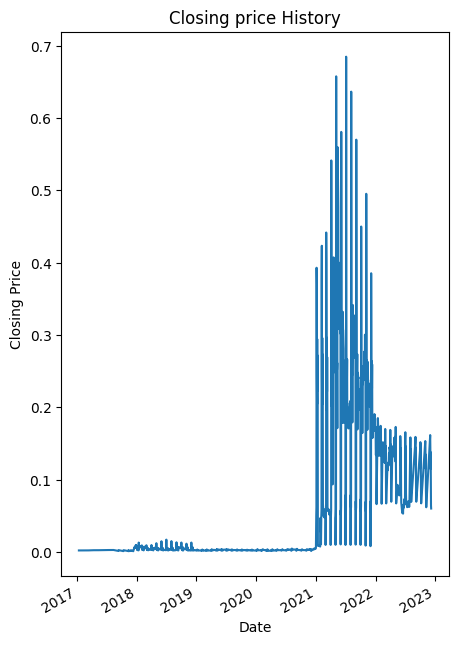

In [80]:
plt.figure(figsize=(5, 8)) # Resizing the plot
train_data['Adj Close'].plot()
plt.title ('Closing price History') # Adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

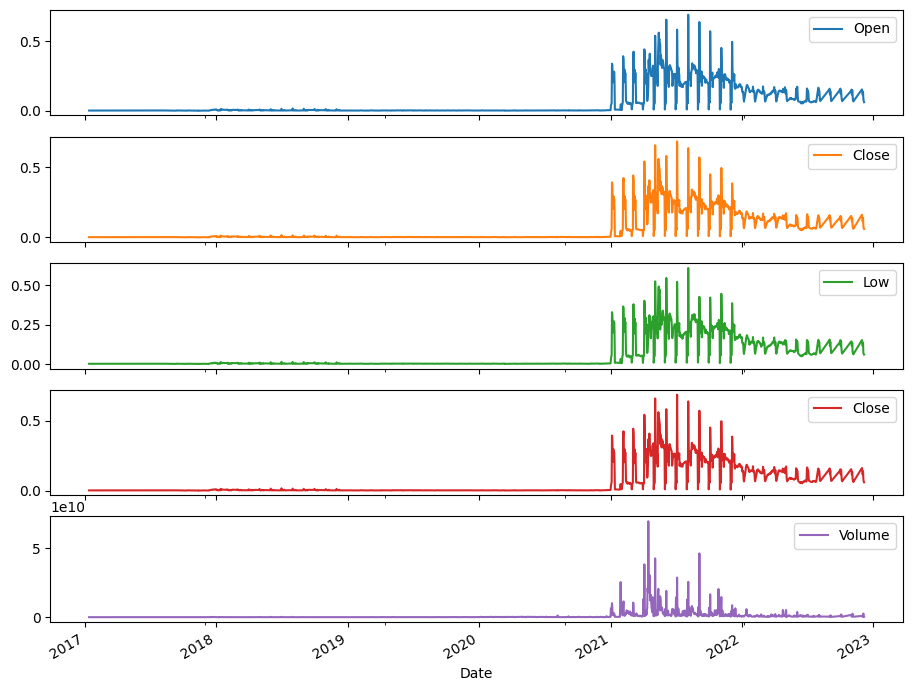

In [81]:
plt.figure(figsize=(16, 8)) # Resizing the plot
cols = ['Open', 'Close', 'Low', 'Close', 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [82]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0
df = train_data[['HL_PCT', 'Adj Close', 'Volume']]

In [83]:
df = train_data[['HL_PCT', 'Adj Close', 'Volume']]

In [84]:
forecast_out = int(math.ceil(0.05 * len(df)))
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

87


<ipython-input-84-c5241f6f8d18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Menggunakan Scaler untuk menormalisasi data, agar range tidak terlalu jauh

In [86]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-86-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


memotong untuk menemukan untuk menentukan X dan Y nya

In [87]:
X_Predictions = X[-forecast_out:]
X = X[:-forecast_out]

 Menentukan y dari label

In [88]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-88-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [92]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [94]:
last_date = df.index[-1]
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
forecast_set = rf.predict(X_Predictions)
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-94-9447877c13a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-94-9447877c13a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-94-9447877c13a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

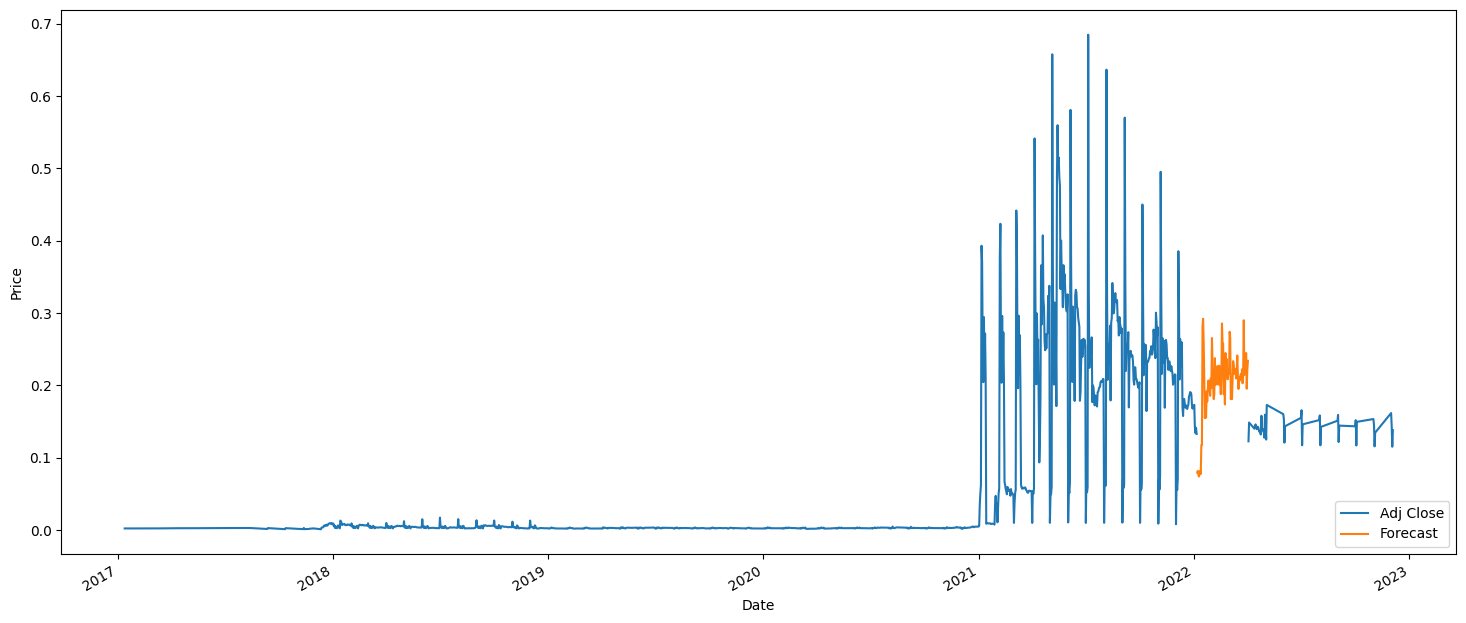

In [95]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()